# Predicting epitope-specific TCR recognition using pre-trained protein embeddings

## Configurations

In [17]:
import sys
import logging

# Logger
logger = logging.getLogger('tcrbert')

# Paths
sys.path.append('/home/hym/TCRBert')
sys.path.append('/home/hym/TCRBert/tcrbert')

outdir = '../output'

## Fine-tunning results

In [21]:
from IPython.display import display
from tcrbert.commons import FileUtils

fn_ft1 = '%s/exp1/exp1.train_0.result.json' % outdir
ft1_result = FileUtils.json_load(fn_ft1)
display(ft1_result)

fn_ft2 = '%s/exp7/train.1.result.json' % outdir
ft2_result = FileUtils.json_load(fn_ft2)
display(ft2_result)


{'metrics': ['accuracy'],
 'train.score': {'loss': [0.6781552154806596,
   0.5971099892749062,
   0.5263835071008417,
   0.45399056884306893,
   0.3888420858715154,
   0.3154121616595908,
   0.27581161298329315,
   0.20350860710008234,
   0.1716768701053873,
   0.1553273776286765,
   0.11390917267225965,
   0.09667724064445193,
   0.0883629109380366,
   0.07574388686614701,
   0.0597161777977702,
   0.057932414420986476,
   0.044999376870691776,
   0.03564236505263591,
   0.038496645037792154,
   0.032411213357095854,
   0.03040241916322067,
   0.02883238064808936,
   0.028782874781968473,
   0.029396393672339146,
   0.03031066255172408,
   0.028650511185862596,
   0.026492425924332083,
   0.02925996044414896,
   0.027719512228158456,
   0.02371242263389728,
   0.024507890991819433,
   0.023636227874438975,
   0.02500492259506372,
   0.027894865014130556,
   0.021628560247842835,
   0.023489107047738152,
   0.020223607282637605,
   0.02332119939589425,
   0.022873411276318794,
   0.021

{'metrics': ['accuracy'],
 'train.score': {'loss': [0.5423330806873061,
   0.32110679676973974,
   0.18867775149546662,
   0.1301959120220952,
   0.09384274248082142,
   0.08020547214992248,
   0.06982230940492001,
   0.0633106113051657,
   0.05739498662145494,
   0.0517647277810248,
   0.05078712398452418,
   0.04763961792772321,
   0.046936739444756855,
   0.041343733859581074,
   0.040446081526075525,
   0.041332919041735014,
   0.03832212482222247,
   0.03867728100838624,
   0.039045743607952224,
   0.033992087926606754,
   0.03408975286678375,
   0.03136349043146671,
   0.034342558685593404,
   0.03120132179419788,
   0.03237344334038071,
   0.03193930478376494,
   0.028798800950579635,
   0.03178571919190951,
   0.027688759104681333,
   0.027239720906318442,
   0.026475667231942997],
  'accuracy': [0.7301135279650904,
   0.8634849308677434,
   0.9255319333444333,
   0.9499139098748474,
   0.9655987458721833,
   0.9707732588591963,
   0.9744222791097791,
   0.9774478993228993,
   

Populating the interactive namespace from numpy and matplotlib


0.7842561141304347

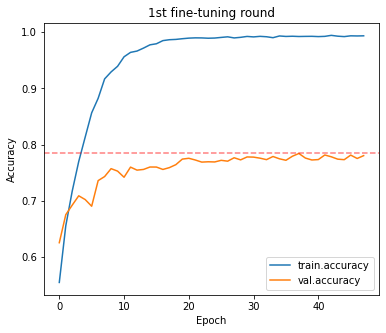

In [62]:
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['train.loss'] = ft1_result['train.score']['loss']
df['train.accuracy'] = ft1_result['train.score']['accuracy']
df['val.loss'] = ft1_result['val.score']['loss']
df['val.accuracy'] = ft1_result['val.score']['accuracy']
val_acc = df['val.accuracy'].max()
display(val_acc)
ax = df.loc[:, ['train.accuracy', 'val.accuracy']].plot(figsize=(6, 5))
ax.set_title('1st fine-tuning round')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.axhline(y=val_acc, alpha=0.5, color='r', linestyle="dashed")


Populating the interactive namespace from numpy and matplotlib


0.9435812203669347

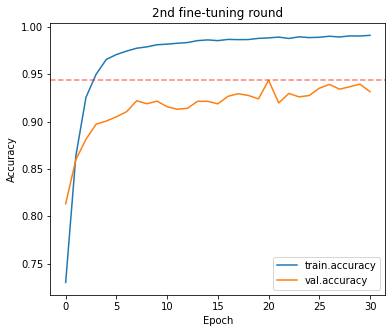

In [63]:
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['train.loss'] = ft2_result['train.score']['loss']
df['train.accuracy'] = ft2_result['train.score']['accuracy']
df['val.loss'] = ft2_result['val.score']['loss']
df['val.accuracy'] = ft2_result['val.score']['accuracy']
val_acc = df['val.accuracy'].max()
display(val_acc)

ax = df.loc[:, ['train.accuracy', 'val.accuracy']].plot(figsize=(6, 5))
ax.set_title('2nd fine-tuning round')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.axhline(y=val_acc, alpha=0.5, color='r', linestyle="dashed")


## Independent evaluation results

In [65]:
!ls ../output/exp7/

eval.immunecode.result.json   train.1.model_17.chk  train.1.model_5.chk
eval.shomuradova.result.json  train.1.model_1.chk   train.1.model_6.chk
eval.zhang.result.json	      train.1.model_20.chk  train.1.model_7.chk
nohup.out		      train.1.model_2.chk   train.1.result.json
train.1.model_0.chk	      train.1.model_3.chk
train.1.model_16.chk	      train.1.model_4.chk


In [67]:
fn_ev1 = '%s/exp7/eval.shomuradova.result.json' % outdir
fn_ev2 = '%s/exp7/eval.immunecode.result.json' % outdir

ev1_result = FileUtils.json_load(fn_ev1)
ev2_result = FileUtils.json_load(fn_ev2)

display(ev1_result['score_map'])
display(ev2_result['score_map'])



{'accuracy': 0.9388392857142858, 'f1': 0.9378093253788975}

{'accuracy': 0.96859375, 'f1': 0.9684247232627423}